Greedy Best-First Search path: [(0, 1), (0, 2), (0, 3), (0, 4), (1, 4), (2, 4), (3, 4), (4, 4)]
A* Search path: [(1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (3, 4), (4, 4)]
A* Total cost: 8


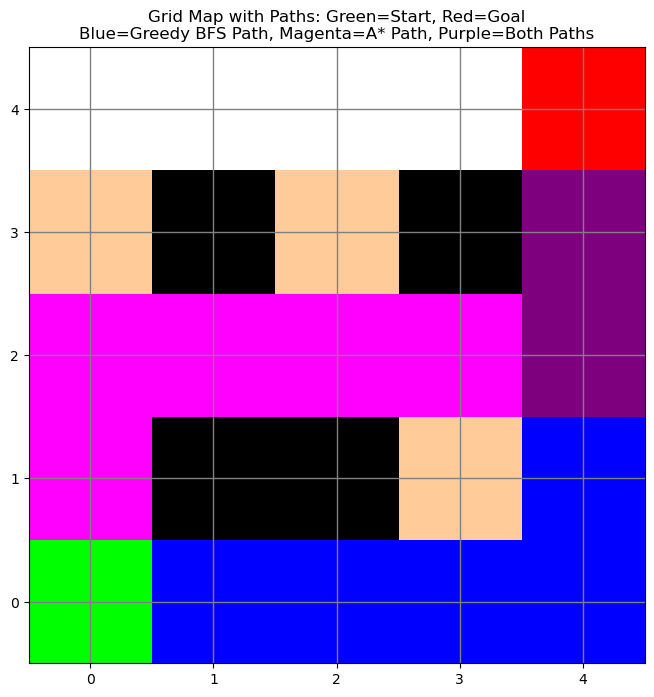

In [2]:

import heapq
import matplotlib.pyplot as plt
import numpy as np

def manhattan_distance(pos, goal):
    return abs(pos[0] - goal[0]) + abs(pos[1] - goal[1])

def get_neighbors(pos, grid):
    rows, cols = len(grid), len(grid[0])
    directions = [(0,1), (1,0), (0,-1), (-1,0)]
    neighbors = []
    for dr, dc in directions:
        nr, nc = pos[0] + dr, pos[1] + dc
        if 0 <= nr < rows and 0 <= nc < cols and grid[nr][nc] != -1:
            neighbors.append((nr, nc))
    return neighbors

def reconstruct_path(came_from, current):
    path = []
    while current in came_from:
        path.append(current)
        current = came_from[current]
    path.reverse()
    return path

def greedy_best_first_search(grid, start, goal):
    open_set = []
    heapq.heappush(open_set, (manhattan_distance(start, goal), start))
    came_from = {}
    visited = set()
    
    while open_set:
        _, current = heapq.heappop(open_set)
        if current == goal:
            return reconstruct_path(came_from, current)
        visited.add(current)
        
        for neighbor in get_neighbors(current, grid):
            if neighbor not in visited:
                heapq.heappush(open_set, (manhattan_distance(neighbor, goal), neighbor))
                if neighbor not in came_from:
                    came_from[neighbor] = current
    return None

def a_star_search(grid, start, goal):
    open_set = []
    heapq.heappush(open_set, (0 + manhattan_distance(start, goal), 0, start))
    came_from = {}
    g_score = {start: 0}
    visited = set()
    
    while open_set:
        f, current_g, current = heapq.heappop(open_set)
        if current == goal:
            return reconstruct_path(came_from, current), current_g
        
        visited.add(current)
        
        for neighbor in get_neighbors(current, grid):
            tentative_g_score = current_g + 1 + grid[neighbor[0]][neighbor[1]]
            if neighbor in g_score and tentative_g_score >= g_score[neighbor]:
                continue
            if neighbor not in visited or tentative_g_score < g_score.get(neighbor, float('inf')):
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score = tentative_g_score + manhattan_distance(neighbor, goal)
                heapq.heappush(open_set, (f_score, tentative_g_score, neighbor))
    return None, float('inf')

def plot_grid(grid, start, goal, path_gbfs, path_astar):
    rows, cols = len(grid), len(grid[0])
    grid_vis = np.zeros((rows, cols, 3))  # RGB image
    
    # Colors
    free_color = np.array([1, 1, 1])        # white
    obstacle_color = np.array([0, 0, 0])    # black
    traffic_color = np.array([1, 0.8, 0.6]) # light orange
    start_color = np.array([0, 1, 0])       # green
    goal_color = np.array([1, 0, 0])        # red
    gbfs_path_color = np.array([0, 0, 1])   # blue
    astar_path_color = np.array([1, 0, 1])  # magenta
    
    for r in range(rows):
        for c in range(cols):
            if grid[r][c] == -1:
                grid_vis[r,c] = obstacle_color
            elif grid[r][c] > 0:
                grid_vis[r,c] = traffic_color
            else:
                grid_vis[r,c] = free_color
    
    # Draw paths
    if path_gbfs:
        for r, c in path_gbfs:
            grid_vis[r,c] = gbfs_path_color
    if path_astar:
        for r, c in path_astar:
            # If cell already blue (gbfs), blend magenta and blue = purple
            if path_gbfs and (r,c) in path_gbfs:
                grid_vis[r,c] = np.array([0.5, 0, 0.5])  # purple
            else:
                grid_vis[r,c] = astar_path_color
                
    # Start and Goal override color
    grid_vis[start[0], start[1]] = start_color
    grid_vis[goal[0], goal[1]] = goal_color
    
    plt.figure(figsize=(8,8))
    
    plt.imshow(grid_vis, interpolation='nearest')
    
    plt.xticks(range(cols))
    plt.yticks(range(rows))
    plt.grid(True, color='gray', linestyle='-', linewidth=1)
    plt.gca().invert_yaxis()
    plt.title("Grid Map with Paths: Green=Start, Red=Goal\nBlue=Greedy BFS Path, Magenta=A* Path, Purple=Both Paths")
    plt.show()

# Example grid
grid = [
    [0, 0, 2, 0, 0],
    [0, -1, -1, 1, 0],
    [0, 0, 0, 0, 0],
    [2, -1, 1, -1, 0],
    [0, 0, 0, 0, 0]
]

start = (0, 0)
goal = (4, 4)

path_gbfs = greedy_best_first_search(grid, start, goal)
path_astar, cost = a_star_search(grid, start, goal)

print("Greedy Best-First Search path:", path_gbfs)
print("A* Search path:", path_astar)
print("A* Total cost:", cost)

plot_grid(grid, start, goal, path_gbfs, path_astar)
